# Import 套件

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians

In [2]:
!wget https://linebot4106029040.herokuapp.com/getfile/B-B03-%E8%87%BA%E4%B8%AD%E5%B8%82%E5%8D%97%E5%8D%80.csv

--2021-06-15 03:48:18--  https://linebot4106029040.herokuapp.com/getfile/B-B03-%E8%87%BA%E4%B8%AD%E5%B8%82%E5%8D%97%E5%8D%80.csv
Resolving linebot4106029040.herokuapp.com (linebot4106029040.herokuapp.com)... 54.159.116.102, 52.5.82.174, 54.165.58.209, ...
Connecting to linebot4106029040.herokuapp.com (linebot4106029040.herokuapp.com)|54.159.116.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5937473 (5.7M) [text/csv]
Saving to: ‘B-B03-臺中市南區.csv’

B-B03-臺中市南區.cs 100%[===================>]   5.66M  33.3MB/s    in 0.2s    

2021-06-15 03:48:18 (33.3 MB/s) - ‘B-B03-臺中市南區.csv’ saved [5937473/5937473]



In [3]:
def y_convert(t):
    t = str(t)
    year = int(t[:-2])
    return year

y_convert('11004')

def percentage_to_float(percent):
    if type(percent) == str:
        return int(percent.replace('.', '').replace('%',''))/10000
    return percent

percentage_to_float('18.88%')

def price_to_10k(price):
    return round(price/10000)

price_to_10k(157200)

def total_floor(f): #tf
    return f.split('/')[1]

def digit(c):
    pair = {
        '一':1, '二':2, '三':3, '四':4, '五':5, '六':6, '七':7, '八':7, '九':9, '十':10 
    }
    return pair[c]

def floor_to_int(f):
    f = f.replace('層', '')
    sum = 0
    if len(f) == 3:             #ex: 二十七
        sum+=digit(f[0])*10     #f[0] = 二
        sum+=digit(f[2])        #f[2] = 七
    if len(f) == 2:
        if not f[0] == '十':    #ex 二十
            sum+=digit(f[0])*10 #f[0] = 二
        else:                   #ex 十七
            sum+=10
            sum+=digit(f[1])
    if len(f) == 1:             #ex 七
        sum+=digit(f)           #f[0] = 七
    return sum

floor_to_int('六十三層')


63

# 預處理

In [4]:
df = pd.read_csv('B-B03-臺中市南區.csv')
#bs - 將字串轉float
df['bs'] = df['bs'].apply(percentage_to_float)
# #lat, lon 轉為弧度
# df['lon'] = df['lon'].apply(radians)
# df['lat'] = df['lat'].apply(radians)
#將年月轉換成年
df['year'] = df['e'].apply(y_convert)
#將每坪單價中的逗號移除
df['p'] = df['p'].str.replace(',','').astype(int)#.apply(price_to_10k)
#坪數 s 改為float
df['s'] = df['s'].str.replace(',','').astype(float)
df

,AA11,AA12,a,b,bs,city,cp,e,el,es,f,fi,g,id,j,k,l,lat,lon,m,p,pimg,r,s,sq,t,tp,type,v,district_code,year
0,其他,NaN,南和路151~180號,住宅大樓(11層含以上有電梯),NaN,B,NaN,11003,有,NaN,九層/十五層,NaN,7.0,0,1,1,1,24.114653,120.667948,有,270916,bt_05.png,61,49.83,We1qR8SXCmZ/4wHtZoXZvcYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物)+車位,"1,350",Biz,3房2廳2衛有隔間,B03,110
1,其他,NaN,學府路146巷1~30號,住宅大樓(11層含以上有電梯),0.5580,B,NaN,11003,有,NaN,十五層/二十一層,NaN,25.0,1,1,1,0,24.129161,120.674391,有,170631,bt_05.png,50,11.14,HSVzMNXKca8od+IMhcfupcYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物),190,Biz,1房0廳1衛有隔間,B03,110
2,其他,NaN,國光路365巷1~30號,華廈(10層含以下有電梯),0.7558,B,NaN,11003,有,NaN,"一層,騎樓,地下層/七層",NaN,29.0,2,3,1,0,24.120737,120.679649,有,153610,bt_06.png,14,41.01,XQ+Lc9g1/c+1QA7xZUgqesYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物),630,Biz,NaN,B03,110
3,其他,NaN,復興路三段1~30號,住宅大樓(11層含以上有電梯),0.9526,B,NaN,11003,有,NaN,八層/十三層,NaN,40.0,3,1,1,0,24.128173,120.667634,有,188688,bt_05.png,17,5.30,GuPBGzZl/ctTy4r4SqZn8cYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物),100,Biz,1房0廳1衛有隔間,B03,110
4,其他,NaN,復興路一段271~300號,住宅大樓(11層含以上有電梯),0.6170,B,NaN,11003,有,NaN,六層/十三層,NaN,28.0,4,1,1,0,24.113345,120.652171,有,187031,bt_05.png,58,10.69,/G/l2TNOfzND4pY1L/yM58YlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物),200,Biz,1房0廳1衛有隔間,B03,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19983,住,NaN,崇倫街31~60號,華廈(10層含以下有電梯),0.8532,B,NaN,9910,無,NaN,四層/九層,0.0,2.0,19983,2,1,0,24.128863,120.657291,有,178079,bt_06.png,32,18.53,avUmpD89/m/II70FOUTtGcYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物),330,Biz,2房2廳2衛有隔間,B03,99
19984,住,NaN,崇倫街31~60號,華廈(10層含以下有電梯),0.8513,B,NaN,9910,無,NaN,九層/九層,0.0,2.0,19984,2,1,1,24.128863,120.657291,有,254486,bt_06.png,32,31.48,8AelbP0pXGz/z1ERUGKG+MYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物)+車位,801,Biz,3房2廳2衛有隔間,B03,99
19985,住,NaN,崇倫街31~60號,華廈(10層含以下有電梯),0.8270,B,NaN,9910,無,NaN,四層/九層,0.0,2.0,19985,2,1,1,24.128863,120.657291,有,228331,bt_06.png,32,20.06,6MRktamAKXa/ONkKSengqcYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物)+車位,458,Biz,2房2廳1衛有隔間,B03,99
19986,住,NaN,崇倫街31~60號,華廈(10層含以下有電梯),0.8203,B,NaN,9910,無,NaN,六層/九層,0.0,2.0,19986,2,1,1,24.128863,120.657291,有,245775,bt_06.png,32,14.36,64PWZRBl/yDmoUg+uYIafMYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物)+車位,353,Biz,1房2廳1衛有隔間,B03,99


### 只取住宅大樓 (樓層>=11樓)

In [5]:
#只保留住宅大樓(11層含以上有電梯)
#df = df.drop(df.loc[(df['b'] == '住宅大樓(11層含以上有電梯)')].index)
df = df.drop(df.loc[(df['b'] == '透天厝')].index)
df = df.drop(df.loc[(df['b'] == '華廈(10層含以下有電梯)')].index)
df = df.drop(df.loc[(df['b'] == '公寓(5樓含以下無電梯)')].index)
df = df.drop(df.loc[(df['b'] == '套房(1房(1廳)1衛)')].index)
df = df.drop(df.loc[(df['b'] == '店面（店舖)')].index)
df = df.drop(df.loc[(df['b'] == '辦公商業大樓')].index)
df = df.drop(df.loc[(df['b'] == '其他')].index)
df = df.drop(df.loc[(df['b'] == '廠辦')].index)
df = df.drop(df.loc[(df['b'] == '工廠')].index)
df = df.drop(df.loc[(df['b'] == '倉庫')].index)
df

,AA11,AA12,a,b,bs,city,cp,e,el,es,f,fi,g,id,j,k,l,lat,lon,m,p,pimg,r,s,sq,t,tp,type,v,district_code,year
0,其他,NaN,南和路151~180號,住宅大樓(11層含以上有電梯),NaN,B,NaN,11003,有,NaN,九層/十五層,NaN,7.0,0,1,1,1,24.114653,120.667948,有,270916,bt_05.png,61,49.83,We1qR8SXCmZ/4wHtZoXZvcYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物)+車位,"1,350",Biz,3房2廳2衛有隔間,B03,110
1,其他,NaN,學府路146巷1~30號,住宅大樓(11層含以上有電梯),0.5580,B,NaN,11003,有,NaN,十五層/二十一層,NaN,25.0,1,1,1,0,24.129161,120.674391,有,170631,bt_05.png,50,11.14,HSVzMNXKca8od+IMhcfupcYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物),190,Biz,1房0廳1衛有隔間,B03,110
3,其他,NaN,復興路三段1~30號,住宅大樓(11層含以上有電梯),0.9526,B,NaN,11003,有,NaN,八層/十三層,NaN,40.0,3,1,1,0,24.128173,120.667634,有,188688,bt_05.png,17,5.30,GuPBGzZl/ctTy4r4SqZn8cYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物),100,Biz,1房0廳1衛有隔間,B03,110
4,其他,NaN,復興路一段271~300號,住宅大樓(11層含以上有電梯),0.6170,B,NaN,11003,有,NaN,六層/十三層,NaN,28.0,4,1,1,0,24.113345,120.652171,有,187031,bt_05.png,58,10.69,/G/l2TNOfzND4pY1L/yM58YlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物),200,Biz,1房0廳1衛有隔間,B03,110
6,其他,NaN,信義南街91~120號,住宅大樓(11層含以上有電梯),0.6489,B,NaN,11003,有,NaN,十一層/二十四層,NaN,24.0,6,5,1,1,24.128219,120.673401,有,148479,bt_05.png,61,44.11,bilil0kXbRGRiPxQGZk4YsYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物)+車位,655,Biz,4房2廳2衛有隔間,B03,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19958,住,NaN,樹德里文心南路541~570號,住宅大樓(11層含以上有電梯),0.4893,B,"850,000",10003,無,59.10%,五層/十五層,1.0,2.0,19958,1,1,1,24.119859,120.651469,有,127630,bt_05.png,70,52.90,IoiZ6omllQc4rBwzJgAkVMYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物)+車位,644,Biz,3房2廳2衛有隔間,B03,100
19959,住,NaN,樹德里文心南路541~570號,住宅大樓(11層含以上有電梯),0.4819,B,"750,000",10003,無,59.94%,五層/十五層,1.0,2.0,19959,1,1,1,24.119859,120.651469,有,143332,bt_05.png,70,46.43,xpl6/22j5QIaZb+4fVSPFcYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物)+車位,610,Biz,2房2廳2衛有隔間,B03,100
19960,住,NaN,樹德里文心南路541~570號,住宅大樓(11層含以上有電梯),0.4939,B,"900,000",10003,無,58.74%,十層/十五層,1.0,2.0,19960,1,1,1,24.119859,120.651469,有,141398,bt_05.png,70,57.19,ytY9OAh9wY+AS72uK2mlrcYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物)+車位,770,Biz,3房2廳2衛有隔間,B03,100
19961,住,NaN,樹德里文心南路541~570號,住宅大樓(11層含以上有電梯),0.4819,B,"850,000",10003,無,59.94%,八層/十五層,1.0,2.0,19961,1,1,1,24.119859,120.651469,有,143332,bt_05.png,70,46.43,L/x4o1QVXsj5x9LydK3jYsYlwFv5WoFSqX/ZwOJem5k=,房地(土地+建物)+車位,620,Biz,2房2廳2衛有隔間,B03,100


In [6]:
#只取101年
df_101 = df.loc[(df['year'] == 101)]
print(len(df_101))

df_101 = df_101.drop(df_101[df_101['f'].isnull()].index)
df_101['tf'] = df_101['f'].apply(total_floor).apply(floor_to_int)

1186


In [7]:
df_101['tf']

18216    22
18217    15
18218    17
18221    16
18222    32
         ..
19817    15
19818    15
19819    15
19820    15
19821    15
Name: tf, Length: 1185, dtype: int64

In [8]:
temp = df_101[['lon','lat','g', 'p', 'bs']]
#temp = df_101[['lon','lat','g', 'p']]
#temp = df_101[['lon','lat','p']]

#去除有空值的
temp = temp.dropna()
print(len(temp))

lower = temp['p'].quantile(0.05)
upper = temp['p'].quantile(0.97)
print(lower) #太便宜
print(upper) #太貴
#剔除極值 - 捨去每坪單價太便宜/太貴
temp = temp.drop(temp.loc[temp['p'] < lower].index)
temp = temp.drop(temp.loc[temp['p'] > upper].index)
#print(len(temp))

#剔除極值 - 捨去每坪單價距離平均 2 個標準差以外的交易
#temp = temp.drop(temp.loc[abs(temp['p'] - temp['p'].mean())>2*temp['p'].std()].index)
#print(len(temp))
# #剔除極值 - 捨去 s 距離平均 2 個標準差以外的交易
# temp = temp.drop(temp.loc[abs(temp['s'] - temp['s'].mean())>2*temp['s'].std()].index)
#剔除極值 - 捨去 bs 距離平均 2 個標準差以外的交易
#temp = temp.drop(temp.loc[abs(temp['bs'] - temp['bs'].mean())>2*temp['bs'].std()].index)
print(len(temp))

835
82258.8
193206.90000000002
767


In [9]:
# #欄位資料完整度
# pd.DataFrame(1 - temp.isnull().mean(), columns={'完整度'})

In [10]:
#看四分位數, 轉整數
temp['p'].describe().apply("{0:.5f}".format)

count       767.00000
mean     137425.19296
std       31022.36834
min       82350.00000
25%      108600.00000
50%      143597.00000
75%      163608.50000
max      192565.00000
Name: p, dtype: object

In [11]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 18216 to 19821
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lon     767 non-null    float64
 1   lat     767 non-null    float64
 2   g       767 non-null    float64
 3   p       767 non-null    int64  
 4   bs      767 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 36.0 KB


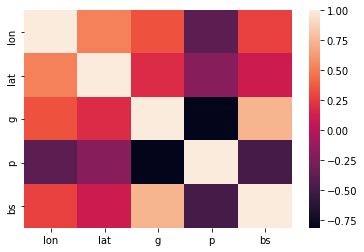

In [12]:
corr = temp.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [13]:
X = temp.drop(columns=['p']).values
y = temp['p'].values

# 訓練

In [14]:
#https://stackoverflow.com/questions/50423489/whats-the-best-way-of-using-gps-coordinate-in-regression-model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split



# for n_neighbors in range(50,100):
#     print(n_neighbors)

best_score = 0
best_model = None

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
    #model = linear_model.LinearRegression()
    #model = KNeighborsRegressor()#n_neighbors=13)
    #model = KNeighborsRegressor(n_neighbors=3, weights='distance', metric='haversine') #只能有兩個維度 lat, lon
    #model = DecisionTreeRegressor()
    model = xgb.XGBRegressor(verbosity = 0) #suppress warning
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    score = round(r2_score(Y_test, Y_pred),2)
    #print(score)
    if score > best_score:
        best_model = model
        best_score = score

print(f'best score: {best_score}')

best score: 0.85


In [15]:
compare = pd.DataFrame({'Y_pred(預測)':Y_pred, 'Y_test(實際)':Y_test})
compare

,Y_pred(預測),Y_test(實際)
0,104284.757812,107792
1,178869.625000,178486
2,157509.437500,145626
3,161994.890625,153372
4,115425.500000,99798
...,...,...
226,161566.625000,160744
227,161566.625000,141379
228,162283.968750,161441
229,108471.593750,116043


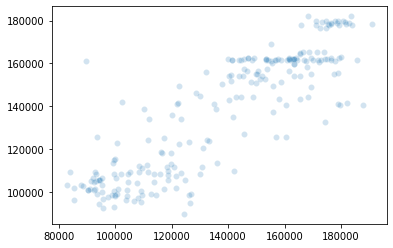

In [16]:
import seaborn as sns
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.2)